<a href="https://colab.research.google.com/github/mitesh98/Amazon-Fine-Food-Review/blob/master/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import nltk
import string
import seaborn as sns

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive'

In [0]:
!cp '/content/drive/My Drive/database.sqlite' 'database.sqlite'

In [0]:
con=sqlite3.connect('database.sqlite')

In [0]:
filtered_data=pd.read_sql_query("SELECT * FROM `Reviews` WHERE `Score` !=3",con)
filtered_data.shape
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
#Change Score into postive or negative
def partition(x):
  if x>3:
    return 'positive'
  return 'negative'

#Using map Function

Actual_Score=filtered_data['Score']
print(type(Actual_Score))
positive_negative=Actual_Score.map(partition)
filtered_data['Score']=positive_negative
filtered_data.shape
filtered_data.head()

<class 'pandas.core.series.Series'>


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Data Cleaning

In [0]:
#Sort Filtered Data in ascendind order accroding to productId
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True)
sorted_data.shape


(525814, 10)

In [0]:
#Drop Duplicates
final_data=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
final_data.shape

(364173, 10)

In [0]:
#Calculating Data Reduced
reduced=(final_data['Id'].size/filtered_data['Id'].size)*100
print(reduced)

69.25890143662969


In [0]:
#HelpfulnessNumerator(YES)<=HelpfulnessDenominator(YES+NO)
incosistance_data=pd.read_sql_query("SELECT * FROM Reviews WHERE HelpfulnessNumerator>HelpfulnessDenominator",con)
incosistance_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [0]:
final_data=final_data[final_data.HelpfulnessDenominator>=final_data.HelpfulnessNumerator]
final_data.shape

(364171, 10)

In [0]:
final_data['Score'].value_counts()
type(final_data)

pandas.core.frame.DataFrame

In [0]:

#if(final_data['Score']=='negative'):
#  sample_data.append

# Bag of Words(Bows)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer()
sample_data=countvector.fit_transform(final_data['Text'][0:2000].values)
sample_data=pd.DataFrame(sample_data.toarray())
type(sample_data)

pandas.core.frame.DataFrame

In [0]:
sample_data.shape

(2000, 10800)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
std_data=StandardScaler()

In [0]:
labels=final_data['Score'].iloc[0:2000]
labels.head(10)
print(type(labels))

<class 'pandas.core.series.Series'>


In [0]:
std_data=std_data.fit_transform(sample_data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.manifold import TSNE

In [0]:
model=TSNE(n_components=2,random_state=0)

In [0]:
tsne_data=model.fit_transform(sample_data)

In [0]:
tsne_dataT=tsne_data.T
tsne_dataT.shape

(2, 2000)

In [0]:
data_f=np.vstack((tsne_dataT,labels.T)).T

In [0]:
data_f.shape

(2000, 3)

In [0]:
data_p=pd.DataFrame(data_f,columns=("1st","2nd","Score"))

In [0]:
data_p.head()

,1st,2nd,Score
0,-14.3671,-17.4187,positive
1,17.4555,-15.5684,positive
2,-11.6431,-10.8146,positive
3,-1.17368,12.8929,positive
4,-3.75647,12.1647,positive


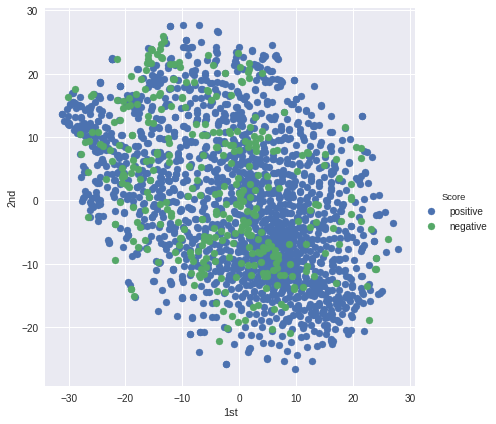

In [0]:
sns.FacetGrid(data_p,hue="Score",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

# TF-IDF

In [0]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2))
tf_idf_count=tf_idf_vect.fit_transform(final_data['Text'][0:2000].values)

In [0]:
tf_idf_count.shape
#print(tf_idf_count)

(2000, 98992)

In [0]:
sample_data1=pd.DataFrame(tf_idf_count.toarray())
type(sample_data1)

pandas.core.frame.DataFrame

In [0]:
features=tf_idf_vect.get_feature_names()
len(features)
features[2000:2010]

['adored',
 'adored and',
 'adores',
 'adores them',
 'adores these',
 'adult',
 'adult and',
 'adult brings',
 'adult cats',
 'adult chicken']

In [0]:
model1=TSNE(n_components=2,random_state=0)
tsne_data1=model1.fit_transform(sample_data1)

In [0]:
tsne_data1.shape
tsne_data1t=tsne_data1.T
tsne_data1t.shape

(2, 2000)

In [0]:
data_f1=np.vstack((tsne_data1t,labels.T)).T
data_f1.shape

(2000, 3)

In [0]:
data_p1=pd.DataFrame(data_f1,columns=("1st","2nd","Score"))

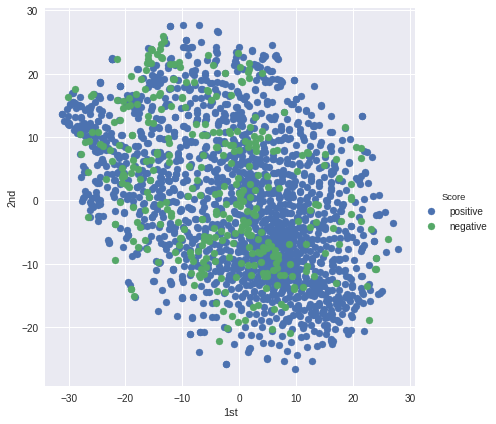

In [0]:
sns.FacetGrid(data_p,hue="Score",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

# Text Processing

In [0]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stops=set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
sno=nltk.stem.SnowballStemmer('english')

In [0]:
#Clean HTML tags
def cleanhtml(sentence):
  cleaner=re.compile('<.*?>')
  cleantext=re.sub(cleaner,' ',sentence)
  return cleantext

In [0]:
#Remove punctution
def cleanpunct(sentence):
  cleaned=re.sub(r'[!|#|$\%|&|*|?|,|.|\'|/|"|)|(]',r'',sentence)
  return cleaned

# Word2Vec

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [0]:
#Train own W2V
import gensim
i=0
list_of_sentence=[]
for sent in final_data['Text'].values:
  filtered_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    #print("W:",w,end="\n")
    #for cleaned_word in cleanpunct(w).split():
    if(w.isalpha()):
      filtered_sentence.append(w.lower())
    else:
      continue
  list_of_sentence.append(filtered_sentence)
      #print(cleaned_word,end="\n")


In [0]:
w2v_model=gensim.models.Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)

In [0]:
w2v_model.wv.most_similar('tasty')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('satisfying', 0.8308330774307251),
 ('delicious', 0.8296337127685547),
 ('tastey', 0.8169349431991577),
 ('yummy', 0.7912845611572266),
 ('flavorful', 0.7635015845298767),
 ('filling', 0.7439260482788086),
 ('nutritious', 0.7365673184394836),
 ('hearty', 0.7244401574134827),
 ('versatile', 0.7051680088043213),
 ('addictive', 0.7030651569366455)]

# Avg W2V

In [0]:
#Average W2V
sentence_vectors=[]
for sent in list_of_sentence:
  sen_vec=np.zeros(50)
  count_word=0
  for word in sent:
    try:
      vec=word2vec.model.wv[word]
      sen_vec+=vec     #like in c sen_vec[i]=vec;i++
      count_word+=1
    except:
      pass 
  sen_vec/=count_word
  sentence_vectors.append(sen_vec)
print(len(sentence_vectors))
print(len(sentence_vectors[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


364171
50


In [0]:
#print(sentence_vectors[:10],"\n")
sample_data2=pd.DataFrame(sentence_vectors[0:2000])
type(sample_data2)

pandas.core.frame.DataFrame

In [0]:
sample_data2.shape

(2000, 50)

In [0]:
sample_data2.head()

In [0]:
std_data2=StandardScaler()
std_data2=std_data2.fit_transform(sample_data2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


In [0]:
model2=TSNE(n_components=2,random_state=0)

In [0]:
std_data2=np.nan_to_num(std_data2)

In [0]:
tnse_data2=model2.fit_transform(std_data2)

In [0]:
tsne_dataT2=tnse_data2.T
tsne_dataT2.shape


(2, 2000)

In [0]:
data_f2=np.vstack((tsne_dataT2,labels.T)).T
data_f2.shape

(2000, 3)

In [0]:
data_p2=pd.DataFrame(data_f2,columns=("1st","2nd","Score"))


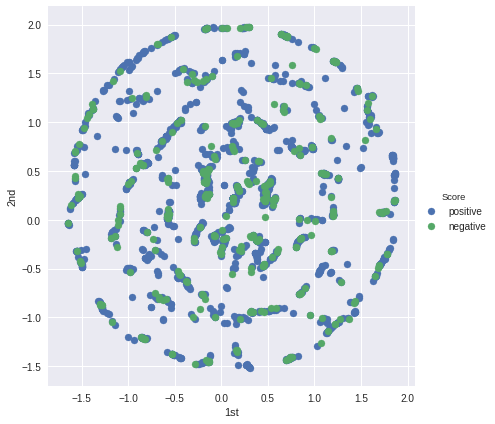

In [0]:
sns.FacetGrid(data_p2,hue="Score",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

# Avf TF-IDF

In [0]:
#Average TFIDf
tfidf_sentence_vectors=[]
row=0
for sent in list_of_sentence:
  sen_vec=np.zeros(50)
  weight_sum=0
  for word in sent:
    try:
      vec=word2vec.model.wv[word]
      tfidf=final_tf_idf[row,tfidf_feat.index(word)]
      sen_vec+=(vec*tfidf)     #like in c sen_vec[i]=vec;i++
      weight_sum+=tf_idf
    except:
      pass 
  sen_vec/=count_word
  tfidf_sentence_vectors.append(sen_vec)
  row+=1
print(len(tfidf_sentence_vectors))
#print(len(sentence_vectors[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


364171


In [0]:
sample_data3=pd.DataFrame(tfidf_sentence_vectors[0:2000])
type(sample_data3)

pandas.core.frame.DataFrame

In [0]:
sample_data3.shape

(2000, 50)

In [0]:
std_data3=StandardScaler()
std_data3=std_data3.fit_transform(sample_data3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


In [0]:
model3=TSNE(n_components=2,random_state=0)

In [0]:
std_data3=np.nan_to_num(std_data3)

In [0]:
tnse_data3=model3.fit_transform(std_data3)

In [0]:
tsne_dataT3=tnse_data3.T
tsne_dataT3.shape

(2, 2000)

In [0]:
data_f3=np.vstack((tsne_dataT3,labels.T)).T
data_f3.shape

(2000, 3)

In [0]:
data_p3=pd.DataFrame(data_f3,columns=("1st","2nd","Score"))


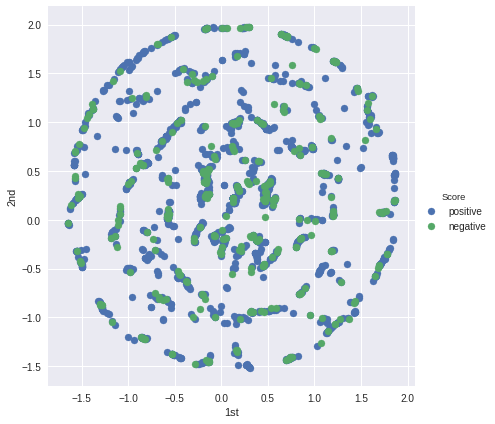

In [0]:
sns.FacetGrid(data_p3,hue="Score",size=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()